## Final Project Submission

Please fill out:
* Student name: Cindy Minyade
* Student pace: Part-time 
* Instructor name: Antony Muiko



## AIRCRAFT RISK ASSESSMENT AND RECOMMENDATION FOR COMMERCIAL BUSINESS EXPANSION



#### Project Overview

This project I will use data cleaning, imputation, analysis and visualization to generate insights for a business stakeholder who is intending to expand their airplane business.

#### Business Problem

The company is entering a new industry, aviation industry, and needs to assess the various aircraft risks. The task is to identify low risk aircraft options and prepare insights of the various models so as to asist in purchasing decisions. 

#### Questions to consider:
- What are the aircraft models with the lowest fatal injuries? 
- What are the aircraft models with the highest fatal injuries?
- What recommendations do you have for the business stakeholder on which aircrafts to consider?

## Project Goal
My project aims to determine which aircrafts are the lowest risk for the company to start this new business endeavor

## Data Source and Data Exploration
This data comes from Kaggle website. It is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. 

## Data Preparation

#### Load the python libraries 
To begin analyzing the dataset, I will import the Pandas library to load the data and clean it.I will also import other libraries that may become useful during data cleaning and visualization. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


#### Loading the data
In the cell below, loading `Aviation_Data.csv` as `aviation_df`
 

In [2]:
# loading data
aviation_df = pd.read_csv("data/Aviation_Data.csv", index_col=0)

# Display the first 5 rows
aviation_df.head(5)


/var/folders/14/11n8463108j28v64ydsd08680000gn/T/ipykernel_80188/3921986474.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("data/Aviation_Data.csv", index_col=0)


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Now to farmiliarize with the data:  
- Understand the dimentions  
- Type of data it contains  
- If there's missing values  

In [3]:
#type
type(aviation_df)

pandas.core.frame.DataFrame

In [4]:
aviation_df.shape

(90348, 30)

In [5]:
#dimentions
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

## Interpretation of the data information
- the data set has 31 columns, 90348 rows
- data has missing values in most columns
- data has 5 columns with float and 25 with string data types

## Performing Data Cleaning 
_What are the aircrafts with the lowest and which are the highest risk?_
- find aircrafts that are safest ( 0 incidents, 0 fatal injuries, 0 serious injuries)
- find out the aircrafts that are unsafe (this are aircrafts with 1 or more incidents and fatal injuries)


### Cleaning and Filtering data

To determine the column that will be selected for this analysis.



In [6]:
#determine the column names

column_names = aviation_df.columns
column_names

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#selecting the relevant columns that we will use for our data anylsis
selected_columns = [
    'Make', 'Model', 'Aircraft.damage', 'Aircraft.Category', 'Total.Fatal.Injuries', 'Broad.phase.of.flight', 'Total.Serious.Injuries', 'Weather.Condition'
]

print(selected_columns)

['Make', 'Model', 'Aircraft.damage', 'Aircraft.Category', 'Total.Fatal.Injuries', 'Broad.phase.of.flight', 'Total.Serious.Injuries', 'Weather.Condition']


## Missing Data

Identifying the missing values in the DataFrame and execute the best best strategy to deal with them, in this case, we will drop the missing values.


In [8]:
#check for missing data in the selected columns
missing_values = aviation_df[selected_columns].isna().sum()
print(missing_values)


Make                       1522
Model                      1551
Aircraft.damage            4653
Aircraft.Category         58061
Total.Fatal.Injuries      12860
Broad.phase.of.flight     28624
Total.Serious.Injuries    13969
Weather.Condition          5951
dtype: int64


In [9]:
# drop the rows with the missing values from the selected columns
clean_aviation_df = aviation_df[selected_columns].dropna()


## Data Analysis

In [10]:
#Grouping the data by aircraft make and model to determine the crafts incidents
damage_summary = (
    clean_aviation_df.groupby(["Make", "Model", "Aircraft.Category", "Aircraft.damage"]) #group data by make, model, and aircraft damage
).size().reset_index(name="Incident.Count")   # to find how many incidents ocurred in each groupedby dataset

damage_summary


,Make,Model,Aircraft.Category,Aircraft.damage,Incident.Count
0,Adams,A55,Balloon,Substantial,1
1,Aero Commander,100,Airplane,Destroyed,1
2,Aero Commander,100,Airplane,Substantial,3
3,Aero Commander,112,Airplane,Substantial,1
4,Aero Commander,112TC,Airplane,Substantial,1
...,...,...,...,...,...
1562,Weatherly,201C,Airplane,Substantial,4
1563,Wing,D-1,Airplane,Destroyed,1
1564,"Wootton, John",Aero Canard,Airplane,Substantial,1
1565,"Wrb Associates, Llc.",Zodiac 601 XL,Airplane,Destroyed,1


## Data Aggregation
Perfomrming data transformation using the groupby and sum functions



In [11]:
# aggregate the data of injuries occured, to have the total number of serious and fatal injuries
injury_summary = (
    clean_aviation_df.groupby(["Make", "Model", "Aircraft.Category"]) #group data by aircraft made and model
    .agg({
        "Total.Fatal.Injuries":"sum", "Total.Serious.Injuries":"sum"   # sum the fatal and serious injuries
    })
    .reset_index()  #reset the index
)


In [12]:
injury_summary

,Make,Model,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries
0,Adams,A55,Balloon,0.0,0.0
1,Aero Commander,100,Airplane,0.0,3.0
2,Aero Commander,112,Airplane,0.0,0.0
3,Aero Commander,112TC,Airplane,0.0,0.0
4,Aero Commander,500S,Airplane,0.0,0.0
...,...,...,...,...,...
1221,Weatherly,201C,Airplane,0.0,0.0
1222,Wing,D-1,Airplane,2.0,0.0
1223,"Wootton, John",Aero Canard,Airplane,1.0,0.0
1224,"Wrb Associates, Llc.",Zodiac 601 XL,Airplane,1.0,0.0


In [13]:
#combine the damage data and the injury data by merging the sets of data
combined_avaiation_summary = pd.merge(damage_summary, injury_summary, on=["Make", "Model", "Aircraft.Category"], how="inner")

In [14]:
combined_avaiation_summary

,Make,Model,Aircraft.Category,Aircraft.damage,Incident.Count,Total.Fatal.Injuries,Total.Serious.Injuries
0,Adams,A55,Balloon,Substantial,1,0.0,0.0
1,Aero Commander,100,Airplane,Destroyed,1,0.0,3.0
2,Aero Commander,100,Airplane,Substantial,3,0.0,3.0
3,Aero Commander,112,Airplane,Substantial,1,0.0,0.0
4,Aero Commander,112TC,Airplane,Substantial,1,0.0,0.0
...,...,...,...,...,...,...,...
1562,Weatherly,201C,Airplane,Substantial,4,0.0,0.0
1563,Wing,D-1,Airplane,Destroyed,1,2.0,0.0
1564,"Wootton, John",Aero Canard,Airplane,Substantial,1,1.0,0.0
1565,"Wrb Associates, Llc.",Zodiac 601 XL,Airplane,Destroyed,1,1.0,0.0


The criteria that we shall use to determine the safe models as follows:
- Aircraft that has `0 fatal injuries` and `0 serious injuries` and also an aircraft that has at most `1 incident count` and `Aircraft.damage=Minor`

In [15]:
#filter the combined aviation data for safe aircraft models
safe_models = combined_avaiation_summary[
    (combined_avaiation_summary["Total.Fatal.Injuries"] == 0) &
     (combined_avaiation_summary["Aircraft.damage"] == "Minor") &
     (combined_avaiation_summary["Aircraft.Category"] == "Airplane") &
     (combined_avaiation_summary["Total.Serious.Injuries"] == 0)
].sort_values("Total.Fatal.Injuries")

### Results
- The results below shows a list of **top 10 aircraft** models that have at most 1 incident count and 0 fatal injuries
- These models appear to be the lowest risk

In [16]:
safe_models.head(10)

,Make,Model,Aircraft.Category,Aircraft.damage,Incident.Count,Total.Fatal.Injuries,Total.Serious.Injuries
71,Airbus Industrie,A320,Airplane,Minor,1,0.0,0.0
856,Fairchild/swearingen,SA226TC,Airplane,Minor,1,0.0,0.0
870,Gates Lear Jet,35A,Airplane,Minor,1,0.0,0.0
873,Gates Learjet,25,Airplane,Minor,1,0.0,0.0
890,Grumman,AA-1A,Airplane,Minor,1,0.0,0.0
936,Gulfstream American,G-159,Airplane,Minor,1,0.0,0.0
937,Gulfstream American,G-159C,Airplane,Minor,1,0.0,0.0
1008,Lockheed,L-1011,Airplane,Minor,1,0.0,0.0
1042,Mcdonnell Douglas,DC-10-30F,Airplane,Minor,1,0.0,0.0
1101,Nord Aviation,262A-12,Airplane,Minor,1,0.0,0.0


The criteria that we shall use to determine the unsafe models as follows:
- Aircraft that has more than `1 fatal injury` and also the aircraft was completely `destroyed`

In [17]:
#filter the combined aviation data for unsafe models
unsafe_models = combined_avaiation_summary[
    (combined_avaiation_summary["Total.Fatal.Injuries"] > 1) &
    (combined_avaiation_summary["Aircraft.damage"] == "Destroyed") &
    (combined_avaiation_summary["Aircraft.Category"] == "Airplane") 
     ].sort_values("Total.Fatal.Injuries", ascending=False)

### Results
- The results below shows a list of **top 10 aircraft** models that have highest fatalities and has their aircraft destroyed from the accident. 
- These models appear to be the highest risk

In [18]:
unsafe_models.head(10)

,Make,Model,Aircraft.Category,Aircraft.damage,Incident.Count,Total.Fatal.Injuries,Total.Serious.Injuries
363,Boeing,747-300,Airplane,Destroyed,1,228.0,26.0
472,Cessna,172N,Airplane,Destroyed,22,36.0,7.0
1233,Piper,PA-28-161,Airplane,Destroyed,13,34.0,4.0
1226,Piper,PA-28-140,Airplane,Destroyed,21,32.0,20.0
862,Fokker,28-4000,Airplane,Destroyed,1,27.0,9.0
448,Cessna,172,Airplane,Destroyed,20,22.0,12.0
711,Cessna,T210M,Airplane,Destroyed,10,19.0,1.0
470,Cessna,172M,Airplane,Destroyed,15,19.0,10.0
435,Cessna,152,Airplane,Destroyed,26,18.0,6.0
797,De Havilland,DHC-6-200,Airplane,Destroyed,2,16.0,14.0


## Data Visualization

In this section, we shall now make graphs to visualize the analysis we have done

### 1. Safe Aircraft Models Bar Chart

This section will display a bar chart that will show the top 10 aircraft models that are safe for purchasing. The aircrafts that contain 0 Fatalities/Serious injuries and has anot more that 1 incident count. 

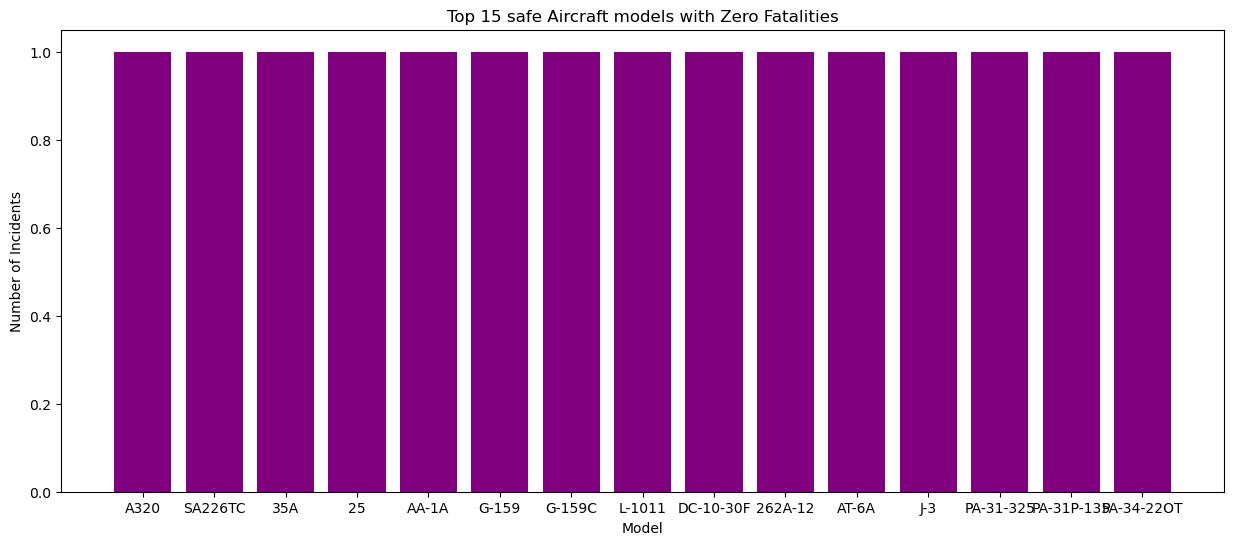

In [19]:
#safe models bar chart
plt.figure(figsize=(15, 6)) #setting the size of the figure (w=15, h=6)
plt.bar(safe_models["Model"].head(15), safe_models["Incident.Count"].head(15), color='purple') #creating a bar graph using the first 10 safe aircraft models

#x label
plt.xlabel("Model") 
#y label
plt.ylabel("Number of Incidents")
#title
plt.title("Top 15 safe Aircraft models with Zero Fatalities")

plt.show()

### 2. Unsafe Aircraft Models Bar Chart

This section will display a bar chart that will show the top 10 aircraft models that are unsafe for purchasing. The aircrafts that contain Fatalities/Serious injuries and has more that 1 incident count. 

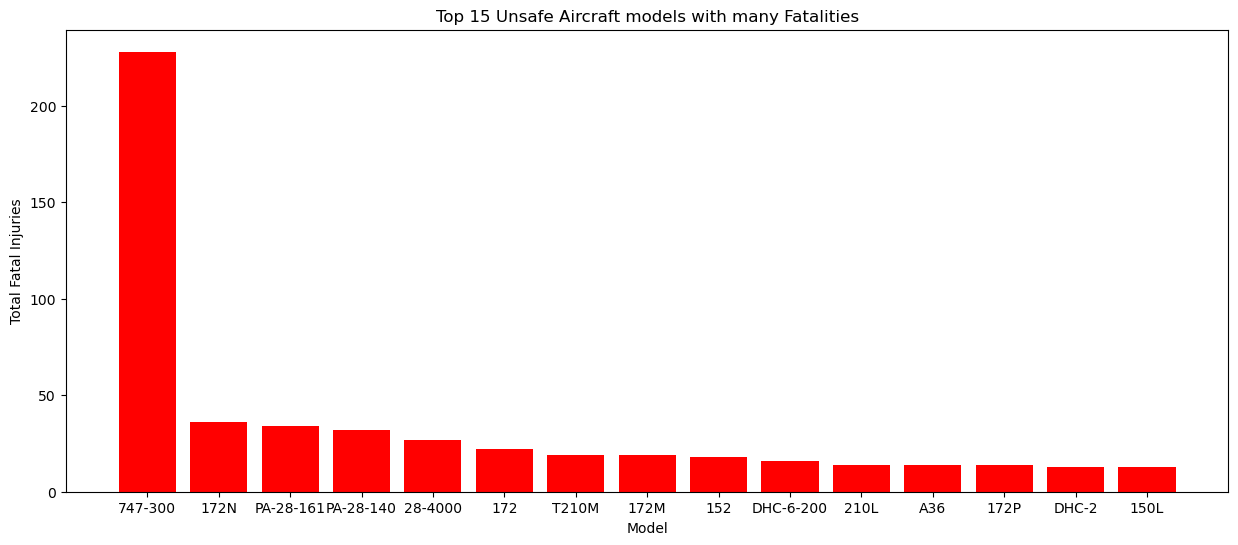

In [20]:
plt.figure(figsize=(15, 6)) #setting the size of the figure (w=15, h=6)
plt.bar(unsafe_models["Model"].head(15), unsafe_models["Total.Fatal.Injuries"].head(15), color='red') #creating a bar graph using the first 10 unsafe aircraft models

#x-axis label
plt.xlabel("Model")
#y-axis label
plt.ylabel("Total Fatal Injuries")
#title
plt.title("Top 15 Unsafe Aircraft models with many Fatalities")

plt.show()


#### Unsafe Aircraft Models Bar Chart with many Incident Counts


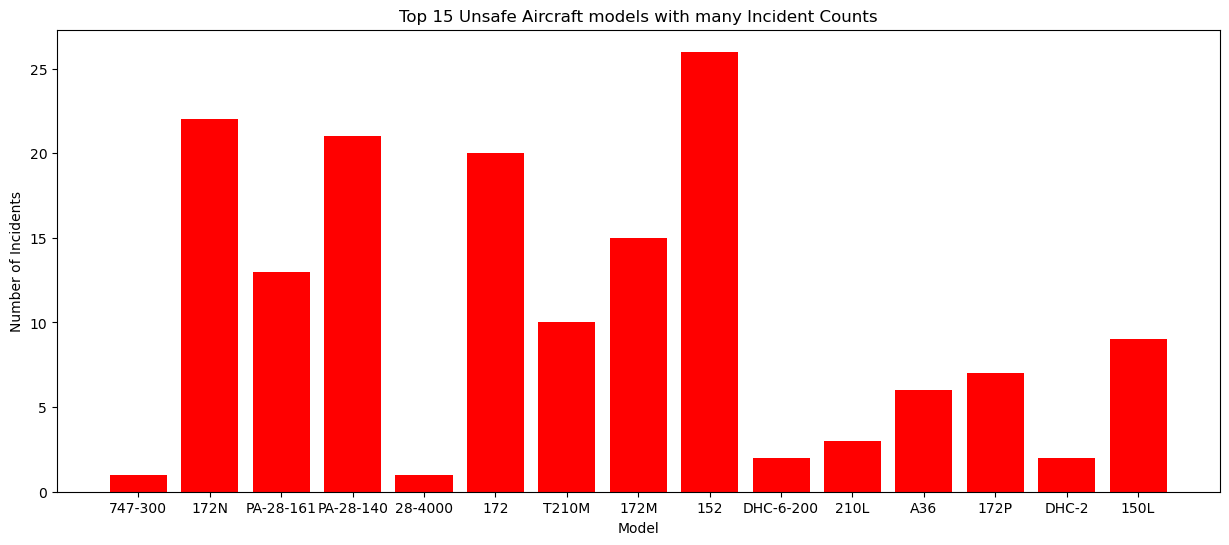

In [21]:
plt.figure(figsize=(15, 6)) #setting the size of the figure (w=15, h=6)
plt.bar(unsafe_models["Model"].head(15), unsafe_models["Incident.Count"].head(15), color='red') #creating a bar graph using the first 10 unsafe aircraft models

#x-axis label
plt.xlabel("Model")
#y-axis label
plt.ylabel("Number of Incidents")
#title
plt.title("Top 15 Unsafe Aircraft models with many Incident Counts")

plt.show()

# Summary
The analysis conducted had the main focus on the number of serious fatalities, and number of incidents. We can be able to draw a conclusion on which aircraft models are safe for purchasing as they have a lower risk compared to the high risk options.

The analysis did not put much consideration into other external factors such as the weather conditions, the phases of the flights and maintanance factors. 
